In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from matplotlib.colors import ListedColormap

In [2]:
# Reading the file
data = pd.read_csv('UTD_DataSet_Final.csv')

In [4]:
# Check for Null Values
data.isnull().sum()

ID              0
Feature_1       0
Feature_2       0
Feature_3       0
Feature_4       0
Feature_5       0
Feature_6       0
Feature_7       0
Feature_8       0
Feature_9       0
Feature_10    382
dtype: int64

In [0]:
import seaborn as sns

In [0]:
### Feature 5

In [0]:
data[['Feature_5']] = data[['Feature_5']].replace([1,2,3,4,5,6,8,10,11,12,13,15,16,19,20,21], [1,18,1,20,20,17,17,17,20,9,1,20,18,17,17,17])
# data.groupby('Feature_5')['Feature_10'].count()

In [0]:
data['Feature_5'] = data['Feature_5'].astype(object)

In [9]:
#ANOVA F Test
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
model = smf.ols(formula='Feature_10 ~ Feature_5', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:             Feature_10   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     13.84
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.88e-18
Time:                        06:43:16   Log-Likelihood:                -32712.
No. Observations:                3400   AIC:                         6.544e+04
Df Residuals:                    3392   BIC:                         6.549e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5263.4191    313.244     

In [0]:
### Feature 6

In [0]:
data[['Feature_6']] = data[['Feature_6']].replace([3,4,5,12,16,18], [16,4,4,2,29,22])
# data.groupby('Feature_6')['Feature_10'].count()

In [0]:
data[['Feature_6']] = data[['Feature_6']].replace([15,23,32,10,4,6,7,8,9,21,22,25,26,30,19,24,27,28,29,31,33,26,16], [11,11,2,11,0,0,0,0,0,0,22,0,0,0,11,11,11,11,22,11,11,0,22])
# train.groupby('Feature_6')['Feature_10'].count(), train.groupby('Feature_6')['Feature_10'].mean()

In [0]:
data['Feature_6'] = data['Feature_6'].astype(object)

In [14]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
model = smf.ols(formula='Feature_10 ~ Feature_6', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:             Feature_10   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     65.57
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           5.96e-89
Time:                        06:43:28   Log-Likelihood:                -32544.
No. Observations:                3400   AIC:                         6.510e+04
Df Residuals:                    3392   BIC:                         6.515e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2749.0312    122.932     

In [0]:
# feature 7

In [0]:
cluster = data.groupby('Feature_7').mean().Feature_10

In [11]:
cluster.dtypes

dtype('float64')

In [12]:
data['cluster'] = data.Feature_7.apply(cluster.get_value)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2551: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  mapped = lib.map_infer(values, f, convert=convert_dtype)


In [19]:
data.shape

(3782, 12)

In [0]:
data = data.sort_values(by=['cluster'],ascending=True)

In [0]:
data.insert(0, 'new_ID', range(1, 1 + len(data)))

In [0]:
data['Feature_7_new'] = divmod(data['new_ID'],600)[0]

In [23]:
data.shape

(3782, 14)

In [0]:
data = data.drop(['cluster', 'new_ID','Feature_7'], axis=1)

In [0]:
data = data.rename(index=str, columns={"Feature_7_new": "Feature_7"})

In [0]:
data['Feature_7'] = data['Feature_7'].astype(object)

In [27]:
data.shape

(3782, 11)

In [0]:
# data.groupby('Feature_7')['Feature_10'].count(),data.groupby('Feature_7')['Feature_10'].mean()

In [29]:
#ANOVA F Test
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
model = smf.ols(formula='Feature_10 ~ Feature_7', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:             Feature_10   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     416.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        06:43:56   Log-Likelihood:                -31821.
No. Observations:                3400   AIC:                         6.366e+04
Df Residuals:                    3393   BIC:                         6.370e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1615.7372    122.210     13.

In [0]:
### Feature 8

In [31]:
# checking the class count for the dataset 
data.groupby('Feature_8')['Feature_10'].count(),data.groupby('Feature_8')['Feature_10'].mean()

(Feature_8
 0       9
 1       2
 2       3
 3    1091
 4       2
 5       6
 6    2284
 7       3
 Name: Feature_10, dtype: int64, Feature_8
 0    1994.444444
 1    2425.000000
 2    2916.666667
 3    5594.408799
 4    1350.000000
 5    8008.333333
 6    3582.070928
 7    1858.333333
 Name: Feature_10, dtype: float64)

In [0]:
data[['Feature_8']] = data[['Feature_8']].replace([0,1,2,4,5,7], [1,1,1,1,5,1])
# data.groupby('Feature_8')['Feature_10'].count()

In [33]:
data.groupby('Feature_8')['Feature_10'].count(),data.groupby('Feature_8')['Feature_10'].mean()

(Feature_8
 1      19
 3    1091
 5       6
 6    2284
 Name: Feature_10, dtype: int64, Feature_8
 1    2096.052632
 3    5594.408799
 5    8008.333333
 6    3582.070928
 Name: Feature_10, dtype: float64)

In [0]:
data['Feature_8'] = data['Feature_8'].astype(object)

In [35]:
#ANOVA F Test
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
model = smf.ols(formula='Feature_10 ~ Feature_8', data=data)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:             Feature_10   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     82.48
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.66e-51
Time:                        06:44:11   Log-Likelihood:                -32640.
No. Observations:                3400   AIC:                         6.529e+04
Df Residuals:                    3396   BIC:                         6.531e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2096.0526    820.088      2.

In [0]:
# Splitting the data set
train = data[data.Feature_10.notnull()]
test = data[data.Feature_10.isnull()]

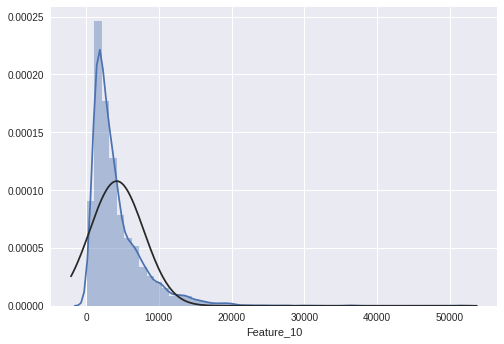

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


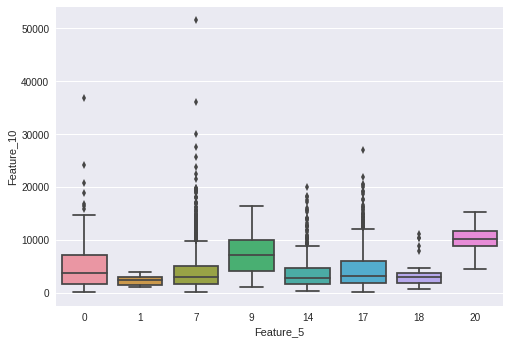

In [37]:
#checking the the distribution of type of feature_5
from scipy.stats import norm
sns.distplot(train['Feature_10'], fit=norm);
plt.show()
sns.boxplot(train['Feature_5'],train['Feature_10'])
plt.show()

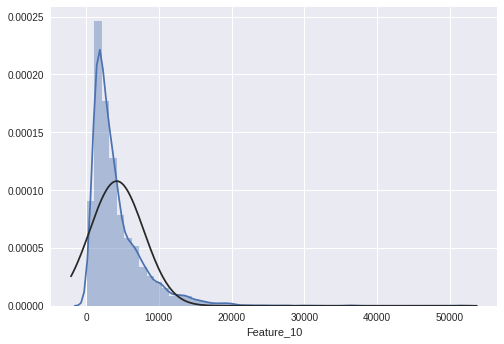

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


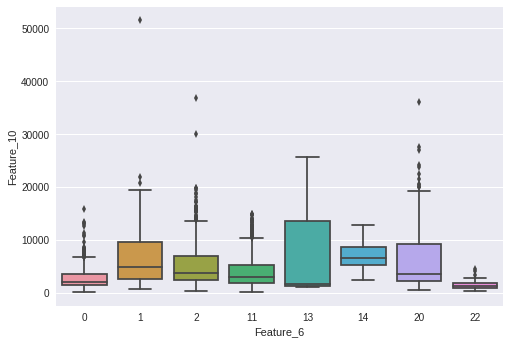

In [38]:
#checking the the distribution of type of feature_6
from scipy.stats import norm
sns.distplot(train['Feature_10'], fit=norm);
plt.show()
sns.boxplot(train['Feature_6'],train['Feature_10'])
plt.show()

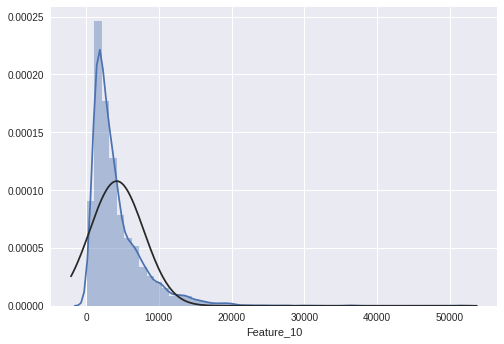

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


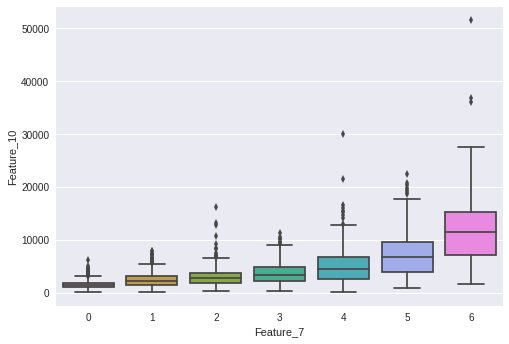

In [39]:
#checking the the distribution of type of feature_7
from scipy.stats import norm
sns.distplot(train['Feature_10'], fit=norm);
plt.show()
sns.boxplot(train['Feature_7'],train['Feature_10'])
plt.show()

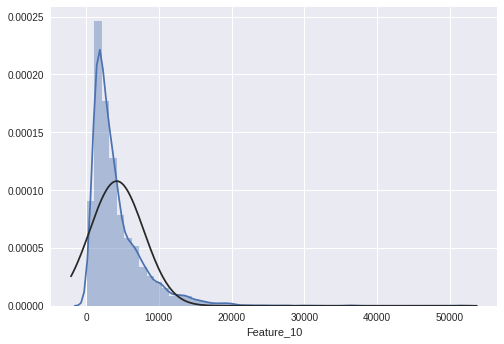

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


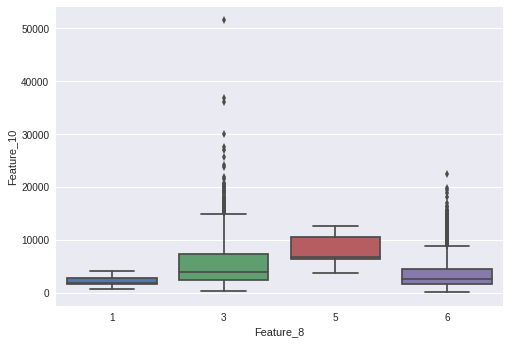

In [40]:
#checking the the distribution of type of feature_8
from scipy.stats import norm
sns.distplot(train['Feature_10'], fit=norm);
plt.show()
sns.boxplot(train['Feature_8'],train['Feature_10'])
plt.show()

(0.0, 420.0)

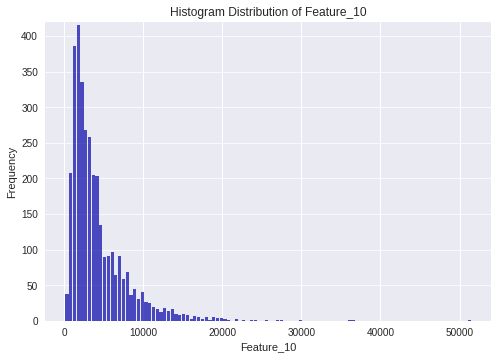

In [41]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=train['Feature_10'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Feature_10')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Feature_10')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 370.0)

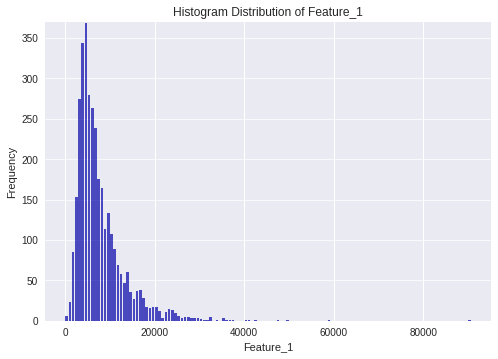

In [42]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=train['Feature_1'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Feature_1')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Feature_1')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 290.0)

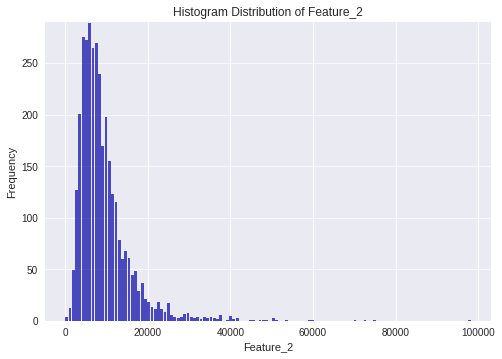

In [43]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=train['Feature_2'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Feature_2')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Feature_2')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 540.0)

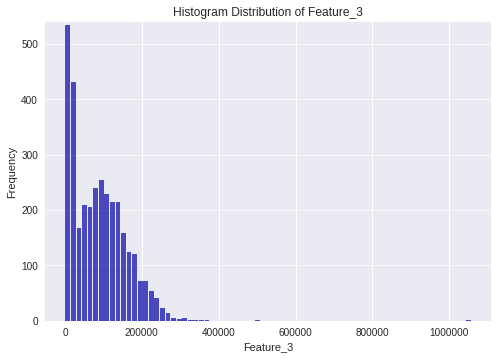

In [44]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=train['Feature_3'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Feature_3')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Feature_3')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 540.0)

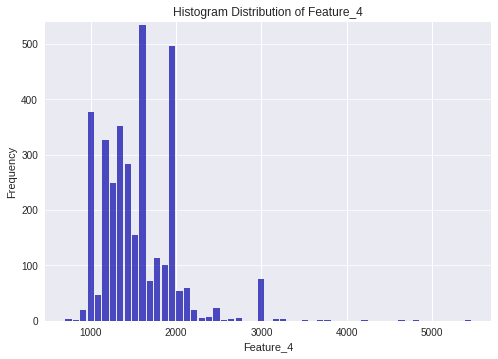

In [45]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=train['Feature_4'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Feature_4')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Feature_4')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 840.0)

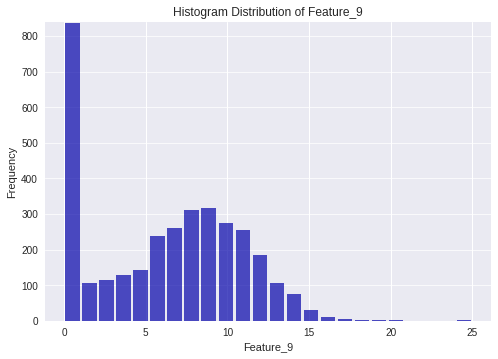

In [46]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=train['Feature_9'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Feature_9')
plt.ylabel('Frequency')
plt.title('Histogram Distribution of Feature_9')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [23]:
train["Feature_10"] = np.log(train.Feature_10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
train.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_8,Feature_9,Feature_10,Feature_7
2955,3527,5355.000,7142.9,156059,1834,14,22,6,14,5.783825,0
2841,3398,2700.000,5000.0,179873,1796,0,22,6,20,5.783825,0
1540,1850,3299.989,2637.3,177979,1870,7,0,3,14,6.109248,0
3019,3599,3927.000,8403.4,111132,1124,7,0,6,10,6.263398,0
3211,3815,2199.953,11000.0,87580,1124,17,0,6,11,6.620073,0


In [24]:
train.shape, test.shape

((3400, 11), (382, 11))

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [0]:
X1_train_org = train.drop(['ID','Feature_5','Feature_6','Feature_7','Feature_8','Feature_10'],axis = 1)
X1_test_org = test.drop(['ID','Feature_5','Feature_6','Feature_7','Feature_8','Feature_10'],axis = 1)

In [27]:
X1_train_org.shape, X1_test_org.shape

((3400, 5), (382, 5))

In [0]:
X11 = scaler.fit_transform(X1_train_org)
X22 = scaler.transform(X1_test_org)

In [0]:
X11 = pd.DataFrame(X11)
X22 = pd.DataFrame(X22)

In [0]:
X12 = train[['Feature_5','Feature_6','Feature_7','Feature_8','Feature_10']]

In [0]:
X21 = test[['Feature_5','Feature_6','Feature_7','Feature_8','Feature_10']]

In [33]:
X11.shape, X12.shape, X21.shape, X22.shape

((3400, 5), (3400, 5), (382, 5), (382, 5))

In [0]:
# X11.dtypes, X12.dtypes, X21.dtypes, X22.dtypes

In [0]:
df_test = pd.concat([X22.reset_index(drop=True), X21.reset_index(drop=True)], axis=1)

In [0]:
df_test = df_test.rename(index=str, columns={0: "Feature_1",1: "Feature_2",2: "Feature_3",3: "Feature_4",4: "Feature_9"})

In [0]:
df_train = pd.concat([X11.reset_index(drop=True), X12.reset_index(drop=True)], axis=1)

In [0]:
df_train = df_train.rename(index=str, columns={0: "Feature_1",1: "Feature_2",2: "Feature_3",3: "Feature_4",4: "Feature_9"})

In [39]:
df_train.shape, df_test.shape

((3400, 10), (382, 10))

In [0]:
# creating X and y data set
Y = df_train['Feature_10'].values
X1 = df_train.drop(['Feature_10'],axis = 1)
X2 = df_test.drop(['Feature_10'],axis = 1)

In [41]:
Y.shape, X1.shape, X2.shape

((3400,), (3400, 9), (382, 9))

In [0]:
Xbef = pd.get_dummies(X1,columns=['Feature_5','Feature_6','Feature_7','Feature_8'])
Xbef_test = pd.get_dummies(X2,columns=['Feature_5','Feature_6','Feature_7','Feature_8'])

In [45]:
Xbef.columns,Xbef_test.columns

(Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_9',
        'Feature_5_0', 'Feature_5_1', 'Feature_5_7', 'Feature_5_9',
        'Feature_5_14', 'Feature_5_17', 'Feature_5_18', 'Feature_5_20',
        'Feature_6_0', 'Feature_6_1', 'Feature_6_2', 'Feature_6_11',
        'Feature_6_13', 'Feature_6_14', 'Feature_6_20', 'Feature_6_22',
        'Feature_7_0', 'Feature_7_1', 'Feature_7_2', 'Feature_7_3',
        'Feature_7_4', 'Feature_7_5', 'Feature_7_6', 'Feature_8_1',
        'Feature_8_3', 'Feature_8_5', 'Feature_8_6'],
       dtype='object'),
 Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_9',
        'Feature_5_0', 'Feature_5_1', 'Feature_5_7', 'Feature_5_14',
        'Feature_5_17', 'Feature_5_18', 'Feature_5_20', 'Feature_6_0',
        'Feature_6_1', 'Feature_6_2', 'Feature_6_11', 'Feature_6_14',
        'Feature_6_17', 'Feature_6_20', 'Feature_6_22', 'Feature_7_0',
        'Feature_7_1', 'Feature_7_2', 'Feature_7_3', 'Feature_7_4',
        'F

In [0]:
Xbef = Xbef.drop(['Feature_5_9','Feature_6_13'],axis = 1)
Xbef_test = Xbef_test.drop(['Feature_6_17'],axis = 1)

In [47]:
Xbef.shape, Xbef_test.shape

((3400, 30), (382, 30))

In [0]:
from sklearn import preprocessing

In [0]:
min_max_scalar = preprocessing.MinMaxScaler()
X = min_max_scalar.fit_transform(Xbef)
X_test = min_max_scalar.transform(Xbef_test)

In [51]:
# creating feature set and target set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 10)

print("The shape of Target set is :"+str(X_train.shape))
print("The shape of feature set is :"+str(y_train.shape))
print("The shape of Target set is :"+str(X_test.shape))
print("The shape of feature set is :"+str(y_test.shape))

The shape of Target set is :(2720, 30)
The shape of feature set is :(2720,)
The shape of Target set is :(680, 30)
The shape of feature set is :(680,)


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()

In [54]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
y_predict=lr.predict(X_test)

In [56]:
lr.score(X_test,y_test)

0.7909436980814615

In [0]:
predictions = lr.predict(X_test)

In [58]:
from sklearn import metrics
import numpy as np
print('MAE for test data set:', metrics.mean_absolute_error(y_test, predictions))
print('MSE for test data set :', metrics.mean_squared_error(y_test, predictions))
print('RMSE for test data set:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE for test data set: 0.27909869190946734
MSE for test data set : 0.12805715210499657
RMSE for test data set: 0.3578507399810661


In [59]:
from sklearn import metrics
print('MAE for train data set:', metrics.mean_absolute_error(y_train, lr.predict( X_train)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, lr.predict( X_train)))
print('RMSE for train data set:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict( X_train))))

MAE for train data set: 0.26800204694959145
MSE for train data set : 0.12476963516747726
RMSE for train data set: 0.3532274552855104


In [60]:
print('R-squared score (training): {:.3f}'
     .format(lr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lr.score(X_test, y_test)))

R-squared score (training): 0.788
R-squared score (test): 0.791


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [0]:
ridge= Ridge(alpha=5 , max_iter= 10000)
param_grid = {'alpha':[0.001,0.05,0.1,1,10,100],
             'max_iter':[1,10,100,1000,10000]}

In [63]:
linridge = Ridge().fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train, linridge.predict( X_train)))

ridge regression linear model intercept: 8.784418615810127
ridge regression linear model coeff:
[ 1.66305698 -1.3495482  -1.0494998   1.51782451 -2.63090652 -0.35378536
  0.02698624 -0.23525852 -0.17166912 -0.13691895 -0.21191992  0.02267116
 -0.10473112  0.1690231   0.08277882 -0.06494988  0.06570459  0.22043355
 -0.19788849 -0.38125166 -0.21471327 -0.12282553 -0.00855259  0.08554692
  0.22300612  0.41879001 -0.06642145  0.01347198  0.07327749 -0.02032802]
R-squared score (training): 0.791
R-squared score (test): 0.795
Number of non-zero features: 30
MAE for train data set : 0.2656516579390247


In [81]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
    r-squared training: {:.2f}, r-squared test: {:.2f}\n'
    .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 53,     r-squared training: 0.79, r-squared test: -112854784765186151915978752.00

Alpha = 1.00
num abs(coeff) > 1.0: 4,     r-squared training: 0.80, r-squared test: 0.79

Alpha = 10.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.77, r-squared test: 0.77

Alpha = 20.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.76, r-squared test: 0.76

Alpha = 50.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.72, r-squared test: 0.72

Alpha = 100.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.68, r-squared test: 0.68

Alpha = 1000.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.38, r-squared test: 0.37



In [82]:
# finding best alpha by gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

grid_search= GridSearchCV(ridge,param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Best parameters: {'alpha': 1}
Best cross-validation score: 0.79


{'alpha': 1}

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [86]:
print('Lasso regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linlasso = Lasso(alpha = this_alpha).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    num_coeff_bigger = np.sum(abs(linlasso.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
    r-squared training: {:.2f}, r-squared test: {:.2f}\n'
    .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Lasso regression: effect of alpha regularization parameter



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


Alpha = 0.00
num abs(coeff) > 1.0: 6,     r-squared training: 0.80, r-squared test: 0.79

Alpha = 1.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.00, r-squared test: -0.00

Alpha = 10.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.00, r-squared test: -0.00

Alpha = 20.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.00, r-squared test: -0.00

Alpha = 50.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.00, r-squared test: -0.00

Alpha = 100.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.00, r-squared test: -0.00

Alpha = 1000.00
num abs(coeff) > 1.0: 0,     r-squared training: 0.00, r-squared test: -0.00



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [87]:
# finding best alpha by gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.0001}
Best cross-validation score: 0.79


In [89]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.0001, 0.001, 0.01]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00
Features kept: 48, r-squared training: 0.80, r-squared test: 0.79

Alpha = 0.00
Features kept: 38, r-squared training: 0.79, r-squared test: 0.79

Alpha = 0.01
Features kept: 24, r-squared training: 0.66, r-squared test: 0.66



In [90]:
print('MAE for train data set :', metrics.mean_absolute_error(y_train, linlasso.predict( X_train)))

MAE for train data set : 0.3408134546353459


In [91]:
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [92]:
scores = cross_val_score(Lasso(alpha=0.0001, max_iter = 10000), X, Y,cv=5)
print("Cross validation scores: {}".format(scores))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Cross validation scores: [-0.57698782  0.52841251  0.60123475  0.68176363  0.58891603]
Best parameters: {'alpha': 0.0001}
Best cross-validation score: 0.79


In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [94]:
knnreg = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train, linridge.predict(X_train)))

R-squared test score: 0.738
MAE for train data set : 0.263265404171606


In [95]:
for i in range (1,10):
    knnreg = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    
    w=knnreg.score(X_test,y_test)
    print(" The Different accuracy values are printed below : ")
    print(i,w)

 The Different accuracy values are printed below : 
1 0.6279115618582918
 The Different accuracy values are printed below : 
2 0.7101333912701941
 The Different accuracy values are printed below : 
3 0.7375467006677026
 The Different accuracy values are printed below : 
4 0.7373908849951423
 The Different accuracy values are printed below : 
5 0.7374643121373223
 The Different accuracy values are printed below : 
6 0.7392188030356255
 The Different accuracy values are printed below : 
7 0.7413291523257114
 The Different accuracy values are printed below : 
8 0.742050390926609
 The Different accuracy values are printed below : 
9 0.7421123896237947


In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)

In [66]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, Y, test_size=0.2, random_state=10)

linreg = LinearRegression().fit(X_train_poly, y_train_poly)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_poly, y_train_poly)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test_poly, y_test_poly)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train_poly, linreg.predict( X_train_poly)))

(poly deg 2) linear model coeff (w):
[-3.96805830e+08 -5.03981456e+11 -2.14040771e+11  1.36252484e+11
  9.08554546e+10  1.52510289e+11 -2.19494104e+11 -1.30699951e+11
 -3.91542526e+11 -9.51900780e+10  2.39247440e+11  5.47642664e+10
 -1.05852871e+11 -1.52348139e+11  1.01272610e+11  1.43265671e+11
  2.85025038e+11 -2.42700370e+11  3.85028520e+10 -1.26753148e+10
 -9.46630897e+10  2.63158252e+11 -6.29184921e+10  6.97404939e+10
 -2.14272433e+11 -3.52763014e+10  1.77174405e+11 -1.24488650e+11
 -4.86683004e+10 -1.00320956e+11 -3.02542533e+11  1.83563107e+00
  5.19361678e+00  1.81249540e+01 -8.48304009e+00  1.42957497e+01
  1.54244614e+00 -1.01140584e+09  3.16127014e+00  4.07629776e+00
  3.26878548e+00  6.86400163e+00  8.38980246e+00  9.02846544e+10
  9.02846544e+10  9.02846544e+10  9.02846544e+10  2.80932262e+10
  9.02846544e+10  9.02846544e+10  7.17984043e+10  7.17984043e+10
  7.17984043e+10  7.17984043e+10  7.17984043e+10  7.17984043e+10
  7.17984043e+10  5.84450026e+10  3.41898397e+11 -1.1

In [67]:
X.shape, X_poly.shape, X_train_poly.shape

((3400, 30), (3400, 496), (2720, 496))

In [68]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X_train_poly, y_train_poly,cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross validation scores: [-5.03521252e+19 -2.61711265e+21 -2.12143584e+15 -1.80849608e+21
 -3.49493654e+20]
Average cross-validation score: -965091326668250152960.00


In [69]:
from sklearn.linear_model import Ridge

ridge=Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search=GridSearchCV(ridge,param_grid,cv=5)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search.fit(X_train_poly,y_train_poly)
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(grid_search.score(X_train_poly, y_train_poly)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(grid_search.score(X_test_poly, y_test_poly)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train_poly, grid_search.predict( X_train_poly)))

(poly deg 2) R-squared score (training): 0.824
(poly deg 2) R-squared score (test): 0.804

MAE for train data set : 0.24347230911221512


In [107]:
from sklearn.linear_model import Lasso

ridge=Lasso()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search=GridSearchCV(ridge,param_grid,cv=5)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search.fit(X_train_poly,y_train_poly)
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(grid_search.score(X_train_poly, y_train_poly)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(grid_search.score(X_test_poly, y_test_poly)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train_poly, grid_search.predict( X_train_poly)))

(poly deg 2) R-squared score (training): 0.804
(poly deg 2) R-squared score (test): 0.792

MAE for train data set : 0.2584914136167431


In [108]:
grid_search.best_score_

0.7812277970148005

In [0]:
from sklearn.svm import SVR

In [85]:
svr = SVR(kernel = 'linear', epsilon = 0.01)
param_grid = {'C': [0.1, 1,10], 'gamma': [100, 10, 1]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train, y_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))

best param:{'C': 1, 'gamma': 100}
R-squared  score(train) : 0.783


In [86]:
svr = SVR(kernel = 'rbf', epsilon = 0.01)
param_grid = {'C': [10,100,1000], 'gamma': [0.1, 0.01,0.001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train, y_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))

best param:{'C': 1000, 'gamma': 0.001}
R-squared  score(train) : 0.785


In [0]:
# creating SVR model with C=1000 and gamma=1
svr = SVR( epsilon = 0.01,kernel='linear', C=1, gamma=100)
svr_rbf = SVR( epsilon = 0.01,kernel='rbf', C=1000, gamma=0.001)

In [127]:
#calculating score and RME
svr.fit(X_train, y_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr.score(X_train,y_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr.score(X_test,y_test)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train, svr.predict(X_train)))

ValueError: ignored

In [89]:
svr_rbf.fit(X_train_scaled, y_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(X_train_scaled,y_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr_rbf.score(X_test,y_test)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train, svr_rbf.predict(X_train_scaled)))

R-squared  score(train) : 0.791
R-squared  score(train) : 0.785
MAE for train data set : 0.24646462533639873


In [0]:
# Genetic Algorithm Implementation

In [91]:
Cnt1 = len(X)
print()
print("# of Obsrvations:",Cnt1)


# of Obsrvations: 3400


In [0]:
p_c = 1 # prob. of crossover
p_m = 0.2 # prob. of mutation
pop = 100
gen = 5
kfold = 3

In [0]:
XY0 = np.array([1,1,1,1,0,0,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,0])

In [0]:
n_list = np.empty((0,len(XY0)))

In [0]:
import random as rd
from sklearn import cross_validation
from sklearn import svm

In [0]:
for i in range(pop):
    rd.shuffle(XY0)
    n_list = np.vstack((n_list,XY0))

In [0]:
# Calculate the FV
    
# X = C

a_X = 10
b_X = 1000
l_X = (len(XY0)/2)

In [0]:
# Y = gamma

a_Y = 0.001
b_Y = 0.1
l_Y = (len(XY0)/2)

In [0]:
Precision_X = (b_X - a_X)/((2**l_X)-1)
Precision_Y = (b_Y - a_Y)/((2**l_Y)-1)

In [0]:
z = 0
t = 1
X0_num_Sum = 0

In [0]:
for i in range(len(XY0)//2):
    X0_num = XY0[-t]*2**z
    X0_num_Sum += X0_num
    t = t+1
    z = z+1

In [0]:
p = 0
u = 1+(len(XY0)//2)
Y0_num_Sum = 0

In [0]:
for i in range(len(XY0)//2):
    Y0_num = XY0[-u]*2**p
    Y0_num_Sum += Y0_num
    u = u+1
    p = p+1

In [0]:
Decoded_X = (X0_num_Sum*Precision_X)+a_X
Decoded_Y = (Y0_num_Sum*Precision_Y)+a_Y

In [105]:
print()
print("Decoded_X:",Decoded_X)
print("Decoded_Y:",Decoded_Y)


Decoded_X: 225.4210028382214
Decoded_Y: 0.07161156041138951


In [0]:
Final_Best_in_Generation_X = []
Worst_Best_in_Generation_X = []

In [0]:
One_Final_Guy = np.empty((0,len(XY0)+2))
One_Final_Guy_Final = []

In [0]:
Min_for_all_Generations_for_Mut_1 = np.empty((0,len(XY0)+1))
Min_for_all_Generations_for_Mut_2 = np.empty((0,len(XY0)+1))

Min_for_all_Generations_for_Mut_1_1 = np.empty((0,len(XY0)+2))
Min_for_all_Generations_for_Mut_2_2 = np.empty((0,len(XY0)+2))

Min_for_all_Generations_for_Mut_1_1_1 = np.empty((0,len(XY0)+2))
Min_for_all_Generations_for_Mut_2_2_2 = np.empty((0,len(XY0)+2))

In [0]:
Generation = 1

In [110]:
for i in range(gen):
    
    
    New_Population = np.empty((0,len(XY0)))
    
    All_in_Generation_X_1 = np.empty((0,len(XY0)+1))
    All_in_Generation_X_2 = np.empty((0,len(XY0)+1))
    
    Min_in_Generation_X_1= []
    Min_in_Generation_X_2 = []
    
    
    Save_Best_in_Generation_X = np.empty((0,len(XY0)+1))
    Final_Best_in_Generation_X = []
    Worst_Best_in_Generation_X = []
    
    
    print()
    print("GENERATION: #:",Generation)
        
    Family = 1
    
    for j in range(int(pop/2)):
        
        print()
        print("Family: #:",Family)
        
        # Tour. Selection
        
        Parents = np.empty((0,len(XY0)))
        
        for i in range(2):
            
            Battle_Troops = []
            
            Warrior_1_index = np.random.randint(0,len(n_list))
            Warrior_2_index = np.random.randint(0,len(n_list))
            Warrior_3_index = np.random.randint(0,len(n_list))
            
            while Warrior_1_index==Warrior_2_index:
                Warrior_1_index = np.random.randint(0,len(n_list))
            while Warrior_2_index==Warrior_3_index:
                Warrior_3_index = np.random.randint(0,len(n_list))
            while Warrior_1_index==Warrior_3_index:
                Warrior_3_index = np.random.randint(0,len(n_list))



            Warrior_1 = n_list[Warrior_1_index]
            Warrior_2 = n_list[Warrior_2_index]
            Warrior_3 = n_list[Warrior_3_index]
            
            Battle_Troops = [Warrior_1,Warrior_2,Warrior_3]
            
            
            # Warrior 1
            
            z = 0
            t = 1
            X0_num_Sum_W1 = 0
            
            for i in range(len(XY0)//2):
                X0_num_W1 = Warrior_1[-t]*2**z
                X0_num_Sum_W1 += X0_num_W1
                t = t+1
                z = z+1
            
            Y0_num_Sum_W1 = 0
            p = 0
            u = 1+(len(XY0)//2)
            Y0_num_Sum = 0
            
            for i in range(len(XY0)//2):
                Y0_num_W1 = Warrior_1[-u]*2**p
                Y0_num_Sum_W1 += Y0_num_W1
                u = u+1
                p = p+1
            
            
            Decoded_X_W1 = (X0_num_Sum_W1*Precision_X)+a_X
            Decoded_Y_W1 = (Y0_num_Sum_W1*Precision_Y)+a_Y
            '''
            print()
            print("Decoded_X_W1:",Decoded_X_W1)
            print("Decoded_Y_W1:",Decoded_Y_W1)
            '''
            P_1 = 0
            
            kf = cross_validation.KFold(Cnt1,n_folds=kfold)
            
            for train_index,test_index in kf:
                X_train,X_test = X[train_index],X[test_index]
                Y_train,Y_test = Y[train_index],Y[test_index]
                
                model1 = svm.SVR(kernel="rbf",C=Decoded_X_W1,gamma=Decoded_Y_W1)
                model1.fit(X_train,Y_train)
                PL1 = model1.predict(X_test)
                
                AC1 = model1.score(X_test,Y_test)
                
                OF_So_Far_1 = 1-(AC1)
                
                P_1 += OF_So_Far_1
                
            OF_So_Far_W1 = P_1/kfold
            
            
            
            # Warrior 2
            
            z = 0
            t = 1
            X0_num_Sum_W2 = 0
            
            for i in range(len(XY0)//2):
                X0_num_W1 = Warrior_1[-t]*2**z
                X0_num_Sum_W1 += X0_num_W1
                t = t+1
                z = z+1
            
            Y0_num_Sum_W2 = 0
            p = 0
            u = 1+(len(XY0)//2)
            Y0_num_Sum = 0
            
            for i in range(len(XY0)//2):
                Y0_num_W2 = Warrior_2[-u]*2**p
                Y0_num_Sum_W2 += Y0_num_W2
                u = u+1
                p = p+1
            
            
            Decoded_X_W2 = (X0_num_Sum_W2*Precision_X)+a_X
            Decoded_Y_W2 = (Y0_num_Sum_W2*Precision_Y)+a_Y
            '''
            print()
            print("Decoded_X_W2:",Decoded_X_W2)
            print("Decoded_Y_W2:",Decoded_Y_W2)
            '''
            P_1 = 0
            
            kf = cross_validation.KFold(Cnt1,n_folds=kfold)
            
            for train_index,test_index in kf:
                X_train,X_test = X[train_index],X[test_index]
                Y_train,Y_test = Y[train_index],Y[test_index]
                
                model1 = svm.SVR(kernel="rbf",C=Decoded_X_W2,gamma=Decoded_Y_W2)
                model1.fit(X_train,Y_train)
                PL1 = model1.predict(X_test)
                
                AC1 = model1.score(X_test,Y_test)
                
                OF_So_Far_2 = 1-(AC1)
                
                P_1 += OF_So_Far_2
                
            OF_So_Far_W2 = P_1/kfold
            
            # Warrior 3
            
            z = 0
            t = 1
            X0_num_Sum_W3 = 0
            
            for i in range(len(XY0)//2):
                X0_num_W1 = Warrior_3[-t]*2**z
                X0_num_Sum_W3 += X0_num_W1
                t = t+1
                z = z+1
            
            Y0_num_Sum_W3 = 0
            p = 0
            u = 1+(len(XY0)//2)
            Y0_num_Sum = 0
            
            for i in range(len(XY0)//2):
                Y0_num_W3 = Warrior_3[-u]*2**p
                Y0_num_Sum_W3 += Y0_num_W1
                u = u+1
                p = p+1
            
            
            Decoded_X_W3 = (X0_num_Sum_W1*Precision_X)+a_X
            Decoded_Y_W3 = (Y0_num_Sum_W1*Precision_Y)+a_Y
            '''
            print()
            print("Decoded_X_W3:",Decoded_X_W3)
            print("Decoded_Y_W3:",Decoded_Y_W3)
            '''
            P_1 = 0
            
            kf = cross_validation.KFold(Cnt1,n_folds=kfold)
            
            for train_index,test_index in kf:
                X_train,X_test = X[train_index],X[test_index]
                Y_train,Y_test = Y[train_index],Y[test_index]
                
                model1 = svm.SVR(kernel="rbf",C=Decoded_X_W3,gamma=Decoded_Y_W3)
                model1.fit(X_train,Y_train)
                PL1 = model1.predict(X_test)
                
                AC1 = model1.score(X_test,Y_test)
                
                OF_So_Far_1 = 1-(AC1)
                
                P_1 += OF_So_Far_1
                
            OF_So_Far_W3 = P_1/kfold

            
            Prize_Warrior_1 = OF_So_Far_W1
            Prize_Warrior_2 = OF_So_Far_W2
            Prize_Warrior_3 = OF_So_Far_W3
            
            
            if Prize_Warrior_1 == min(Prize_Warrior_1,Prize_Warrior_2,Prize_Warrior_3):
                Winner = Warrior_1
                Prize = Prize_Warrior_1

            if Prize_Warrior_2 == min(Prize_Warrior_1,Prize_Warrior_2,Prize_Warrior_3):
                Winner = Warrior_2
                Prize = Prize_Warrior_2
            
            if Prize_Warrior_3 == min(Prize_Warrior_1,Prize_Warrior_2,Prize_Warrior_3):
                Winner = Warrior_3
                Prize = Prize_Warrior_3


            Parents = np.vstack((Parents,Winner))
        '''
        print(Parents)
        '''
        Parent_1 = Parents[0]
        Parent_2 = Parents[1]
        
        
        # Crossover
        
        Child_1 = np.empty((0,len(XY0)))
        Child_2 = np.empty((0,len(XY0)))
        
        
        
        
        Ran_CO_1 = np.random.rand()
        
        if Ran_CO_1 < p_c:
            
            
            Cr_1 = np.random.randint(0,len(XY0))
            Cr_2 = np.random.randint(0,len(XY0))
            
            while Cr_1 == Cr_2:
                Cr_2 = np.random.randint(0,len(XY0))
                
            if Cr_1 < Cr_2:
                
                Med_Seg_1 = Parent_1[Cr_1:Cr_2+1]
                Med_Seg_2 = Parent_2[Cr_1:Cr_2+1]
                
                First_Seg_1 = Parent_1[:Cr_1]
                Sec_Seg_1 = Parent_1[Cr_2+1:]
                
                First_Seg_2 = Parent_2[:Cr_1]
                Sec_Seg_2 = Parent_2[Cr_2+1:]
                
                Child_1 = np.concatenate((First_Seg_1,Med_Seg_2,Sec_Seg_1))
                Child_2 = np.concatenate((First_Seg_2,Med_Seg_1,Sec_Seg_2))
                
            else:
                
                Med_Seg_1 = Parent_1[Cr_2:Cr_1+1]
                Med_Seg_2 = Parent_2[Cr_2:Cr_1+1]
                
                First_Seg_1 = Parent_1[:Cr_2]
                Sec_Seg_1 = Parent_1[Cr_1+1:]
                
                First_Seg_2 = Parent_2[:Cr_2]
                Sec_Seg_2 = Parent_2[Cr_1+1:]
                
                Child_1 = np.concatenate((First_Seg_1,Med_Seg_2,Sec_Seg_1))
                Child_2 = np.concatenate((First_Seg_2,Med_Seg_1,Sec_Seg_2))
        
        else:
            Child_1 = Parent_1
            Child_2 = Parent_2
            
        '''
        print()
        print("Child_1:",Child_1)
        print("Child_2:",Child_2)
        '''
        
        Mutated_Child_1 = []
        
        t = 0
        
        for i in Child_1:
            
            Ran_Mut_1 = np.random.rand()
            
            if Ran_Mut_1 < p_m:
                
                if Child_1[t] == 0:
                    Child_1[t] = 1
                else:
                    Child_1[t] = 0
                t = t+1
                
                Mutated_Child_1 = Child_1
                
            else:
                Mutated_Child_1 = Child_1
                
        
        Mutated_Child_2 = []
        
        t = 0
        
        for i in Child_2:
            
            Ran_Mut_2 = np.random.rand()
            
            if Ran_Mut_2 < p_m:
                
                if Child_2[t] == 0:
                    Child_2[t] = 1
                else:
                    Child_2[t] = 0
                t = t+1
                
                Mutated_Child_2 = Child_2
                
            else:
                Mutated_Child_2 = Child_2
        '''
        print()
        print("Mutated_Child_1:",Mutated_Child_1)
        print("Mutated_Child_2:",Mutated_Child_2)
        '''
        
        # For mutated child_1
        
        X0_num_Sum_MC_1 = 0
        Y0_num_Sum_MC_1 = 0
        
        z = 0
        t = 1
        
        
        for i in range(len(XY0)//2):
            X0_num_M1 = Mutated_Child_1[-t]*2**z
            X0_num_Sum_MC_1 += X0_num_M1
            t = t+1
            z = z+1
        
        p = 0
        u = 1+(len(XY0)//2)
        
        for i in range(len(XY0)//2):
            Y0_num_M1 = Mutated_Child_1[-u]*2**p
            Y0_num_Sum_MC_1 += Y0_num_M1
            u = u+1
            p = p+1
        
        
        Decoded_X_M1 = (X0_num_Sum_MC_1*Precision_X)+a_X
        Decoded_Y_M1 = (Y0_num_Sum_MC_1*Precision_Y)+a_Y
        '''
        print()
        print("Decoded_X_M1:",Decoded_X_M1)
        print("Decoded_Y_M1:",Decoded_Y_M1)
        '''
        P_1 = 0
        
        kf = cross_validation.KFold(Cnt1,n_folds=kfold)
        
        for train_index,test_index in kf:
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            
            model1 = svm.SVR(kernel="rbf",C=Decoded_X_M1,gamma=Decoded_Y_M1)
            model1.fit(X_train,Y_train)
            PL1 = model1.predict(X_test)
            
            AC1 = model1.score(X_test,Y_test)
            
            OF_So_Far_1 = 1-(AC1)
            
            P_1 += OF_So_Far_1
            
        OF_So_Far_M1 = P_1/kfold


        # For mutated child_2
        
        X0_num_Sum_MC_2 = 0
        Y0_num_Sum_MC_2 = 0
        
        z = 0
        t = 1
        
        
        for i in range(len(XY0)//2):
            X0_num_M2 = Mutated_Child_2[-t]*2**z
            X0_num_Sum_MC_2 += X0_num_M2
            t = t+1
            z = z+1
        
        p = 0
        u = 1+(len(XY0)//2)
        
        for i in range(len(XY0)//2):
            Y0_num_M2 = Mutated_Child_2[-u]*2**p
            Y0_num_Sum_MC_2 += Y0_num_M2
            u = u+1
            p = p+1
        
        
        Decoded_X_M2 = (X0_num_Sum_MC_2*Precision_X)+a_X
        Decoded_Y_M2 = (Y0_num_Sum_MC_2*Precision_Y)+a_Y
        '''
        print()
        print("Decoded_X_M2:",Decoded_X_M2)
        print("Decoded_Y_M2:",Decoded_Y_M2)
        '''
        P_1 = 0
        
        kf = cross_validation.KFold(Cnt1,n_folds=kfold)
        
        for train_index,test_index in kf:
            X_train,X_test = X[train_index],X[test_index]
            Y_train,Y_test = Y[train_index],Y[test_index]
            
            model1 = svm.SVR(kernel="rbf",C=Decoded_X_M2,gamma=Decoded_Y_M2)
            model1.fit(X_train,Y_train)
            PL1 = model1.predict(X_test)
            
            AC1 = model1.score(X_test,Y_test)
            
            OF_So_Far_2 = 1-(AC1)
            
            P_1 += OF_So_Far_2
            
        OF_So_Far_M2 = P_1/kfold
        
        
        print()
        print("FV for Mutated Child #1 at Gen",Generation,":",OF_So_Far_M1)
        print("FV for Mutated Child #2 at Gen",Generation,":",OF_So_Far_M2)


        All_in_Generation_X_1_1_temp = Mutated_Child_1[np.newaxis]
        
        All_in_Generation_X_1_1 = np.column_stack((OF_So_Far_M1,All_in_Generation_X_1_1_temp))
        
        All_in_Generation_X_2_2_temp = Mutated_Child_2[np.newaxis]
        
        All_in_Generation_X_2_2 = np.column_stack((OF_So_Far_M2,All_in_Generation_X_2_2_temp))
        
        
        All_in_Generation_X_1 = np.vstack((All_in_Generation_X_1,All_in_Generation_X_1_1))
        All_in_Generation_X_2 = np.vstack((All_in_Generation_X_2,All_in_Generation_X_2_2))
        
        
        Save_Best_in_Generation_X = np.vstack((All_in_Generation_X_1,All_in_Generation_X_2))


        New_Population = np.vstack((New_Population,Mutated_Child_1,Mutated_Child_2))
        
        R_1 = []
        t = 0
        for i in All_in_Generation_X_1:
            
            if(All_in_Generation_X_1[t,:1]) <= min(All_in_Generation_X_1[:,:1]):
                R_1 = All_in_Generation_X_1[t,:]
            t = t+1
            
        
        Min_in_Generation_X_1 = R_1[np.newaxis]
        
        
        R_2 = []
        t = 0
        for i in All_in_Generation_X_2:
            
            if(All_in_Generation_X_2[t,:1]) <= min(All_in_Generation_X_2[:,:1]):
                R_2 = All_in_Generation_X_2[t,:]
            t = t+1
            
        
        Min_in_Generation_X_2 = R_2[np.newaxis]
        
        
        Family = Family+1
        
        
    t = 0
    R_11 = []
    for i in Save_Best_in_Generation_X:
        
        if (Save_Best_in_Generation_X[t,:1]) <= min(Save_Best_in_Generation_X[:,:1]):
            R_11 = Save_Best_in_Generation_X[t,:]
        t = t+1
            
    Final_Best_in_Generation_X = R_11[np.newaxis]
    
    
    t = 0
    R_22 = []
    for i in Save_Best_in_Generation_X:
        
        if (Save_Best_in_Generation_X[t,:1]) >= max(Save_Best_in_Generation_X[:,:1]):
            R_22 = Save_Best_in_Generation_X[t,:1]
        t = t+1
            
    Worst_Best_in_Generation_X = R_22[np.newaxis]
    
    
    Darwin_Guy = Final_Best_in_Generation_X[:]
    Not_So_Darwin_Guy = Worst_Best_in_Generation_X[:]
    
    
    Darwin_Guy = Darwin_Guy[0:,1:].tolist()
    Not_So_Darwin_Guy = Not_So_Darwin_Guy[0:,1:].tolist()
    
    Best_1 = np.where((New_Population==Darwin_Guy))
    Worst_1 = np.where((New_Population==Not_So_Darwin_Guy))
    
    
    New_Population[Worst_1] = Darwin_Guy
    
    n_list = New_Population

    
    Min_for_all_Generations_for_Mut_1 = np.vstack((Min_for_all_Generations_for_Mut_1,
                                                   Min_in_Generation_X_1))
    Min_for_all_Generations_for_Mut_2 = np.vstack((Min_for_all_Generations_for_Mut_2,
                                                   Min_in_Generation_X_2))
    
    
    Min_for_all_Generations_for_Mut_1_1 = np.insert(Min_in_Generation_X_1,0,Generation)
    Min_for_all_Generations_for_Mut_2_2 = np.insert(Min_in_Generation_X_2,0,Generation)
    
    
    Min_for_all_Generations_for_Mut_1_1_1 = np.vstack((Min_for_all_Generations_for_Mut_1_1_1,
                                                       Min_for_all_Generations_for_Mut_1_1))
    
    Min_for_all_Generations_for_Mut_2_2_2 = np.vstack((Min_for_all_Generations_for_Mut_2_2_2,
                                                       Min_for_all_Generations_for_Mut_2_2))
    
    
    Generation = Generation+1
    
One_Final_Guy = np.vstack((Min_for_all_Generations_for_Mut_1_1_1,
                            Min_for_all_Generations_for_Mut_2_2_2))

t = 0
Final_Here = []

for i in One_Final_Guy:
    if(One_Final_Guy[t,1]) <= min(One_Final_Guy[:,1]):
        Final_Here = One_Final_Guy[t,:]
    t = t+1
    
One_Final_Guy_Final = Final_Here[np.newaxis]

print()
print("Min in all Generations:",One_Final_Guy_Final)

print()
print("Final Solution:",One_Final_Guy_Final[:,2:])
print("Highest R2:",(1-One_Final_Guy_Final[:,1]))

XY0_Encoded_After = One_Final_Guy_Final[:,2:][0]


z = 0
t = 1
X0_num_Sum_Encoded_After = 0

for i in range(len(XY0)//2):
    X0_num_Encoded_After = XY0_Encoded_After[-t]*2**z
    X0_num_Sum_Encoded_After += X0_num_Encoded_After
    t = t+1
    z = z+1
    
p = 0
u = 1+(len(XY0)//2)
Y0_num_Sum_Encoded_After = 0

for i in range(len(XY0)//2):
    Y0_num_Encoded_After = XY0_Encoded_After[-u]*2**p
    Y0_num_Sum_Encoded_After += Y0_num_Encoded_After
    u = u+1
    p = p+1


Decoded_X_Encoded_After = (X0_num_Sum_Encoded_After*Precision_X)+a_X
Decoded_Y_Encoded_After = (Y0_num_Sum_Encoded_After*Precision_Y)+a_Y

print()
print("Decoded_X_Encoded_After:",Decoded_X_Encoded_After)
print("Decoded_Y_Encoded_After:",Decoded_Y_Encoded_After)


GENERATION: #: 1

Family: #: 1

FV for Mutated Child #1 at Gen 1 : 0.8056594590596688
FV for Mutated Child #2 at Gen 1 : 0.8732017538242696

Family: #: 2

FV for Mutated Child #1 at Gen 1 : 1.2866933030884522
FV for Mutated Child #2 at Gen 1 : 0.7514379505003944

Family: #: 3

FV for Mutated Child #1 at Gen 1 : 0.89340501703784
FV for Mutated Child #2 at Gen 1 : 0.8086284575123369

Family: #: 4

FV for Mutated Child #1 at Gen 1 : 1.2962480171799335
FV for Mutated Child #2 at Gen 1 : 1.2815931620952206

Family: #: 5

FV for Mutated Child #1 at Gen 1 : 0.7463004925823404
FV for Mutated Child #2 at Gen 1 : 0.8315488505961287

Family: #: 6

FV for Mutated Child #1 at Gen 1 : 1.1849345602862666
FV for Mutated Child #2 at Gen 1 : 1.2955659005150169

Family: #: 7

FV for Mutated Child #1 at Gen 1 : 1.1821097751410279
FV for Mutated Child #2 at Gen 1 : 1.2902873688850323

Family: #: 8

FV for Mutated Child #1 at Gen 1 : 1.3033652275723508
FV for Mutated Child #2 at Gen 1 : 0.8043524170685936


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:529: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.



FV for Mutated Child #1 at Gen 2 : 1.153283681161992
FV for Mutated Child #2 at Gen 2 : 0.9120368722979322

Family: #: 2

FV for Mutated Child #1 at Gen 2 : 1.1229481257477854
FV for Mutated Child #2 at Gen 2 : 1.1061502936777245

Family: #: 3

FV for Mutated Child #1 at Gen 2 : 1.124103796836061
FV for Mutated Child #2 at Gen 2 : 1.0206982695746256

Family: #: 4

FV for Mutated Child #1 at Gen 2 : 1.1069504349782362
FV for Mutated Child #2 at Gen 2 : 1.1589632374033978

Family: #: 5

FV for Mutated Child #1 at Gen 2 : 1.1118405768705077
FV for Mutated Child #2 at Gen 2 : 1.1949209656443145

Family: #: 6

FV for Mutated Child #1 at Gen 2 : 1.1460905562455388
FV for Mutated Child #2 at Gen 2 : 0.7555590245170287

Family: #: 7

FV for Mutated Child #1 at Gen 2 : 1.2243554488708694
FV for Mutated Child #2 at Gen 2 : 1.1538739303596304

Family: #: 8

FV for Mutated Child #1 at Gen 2 : 0.8897548837697499
FV for Mutated Child #2 at Gen 2 : 1.148194734921568

Family: #: 9

FV for Mutated Chi

In [0]:
One_Final_Guy = np.vstack((Min_for_all_Generations_for_Mut_1_1_1,
                            Min_for_all_Generations_for_Mut_2_2_2))

t = 0
Final_Here = []

for i in One_Final_Guy:
    if(One_Final_Guy[t,1]) <= min(One_Final_Guy[:,1]):
        Final_Here = One_Final_Guy[t,:]
    t = t+1

In [0]:
One_Final_Guy_Final = Final_Here[np.newaxis]

In [113]:
print()
print("Min in all Generations:",One_Final_Guy_Final)

print()
print("Final Solution:",One_Final_Guy_Final[:,2:])
print("Highest R2:",(1-One_Final_Guy_Final[:,1]))

XY0_Encoded_After = One_Final_Guy_Final[:,2:][0]


z = 0
t = 1
X0_num_Sum_Encoded_After = 0

for i in range(len(XY0)//2):
    X0_num_Encoded_After = XY0_Encoded_After[-t]*2**z
    X0_num_Sum_Encoded_After += X0_num_Encoded_After
    t = t+1
    z = z+1
    
p = 0
u = 1+(len(XY0)//2)
Y0_num_Sum_Encoded_After = 0

for i in range(len(XY0)//2):
    Y0_num_Encoded_After = XY0_Encoded_After[-u]*2**p
    Y0_num_Sum_Encoded_After += Y0_num_Encoded_After
    u = u+1
    p = p+1


Decoded_X_Encoded_After = (X0_num_Sum_Encoded_After*Precision_X)+a_X
Decoded_Y_Encoded_After = (Y0_num_Sum_Encoded_After*Precision_Y)+a_Y

print()
print("Decoded_X_Encoded_After:",Decoded_X_Encoded_After)
print("Decoded_Y_Encoded_After:",Decoded_Y_Encoded_After)


Min in all Generations: [[4.         0.72570162 0.         0.         0.         0.
  0.         0.         0.         1.         0.         1.
  1.         1.         1.         0.         1.         0.
  0.         1.         0.         0.         0.         1.
  1.         1.         0.         1.         1.         1.
  1.         1.        ]]

Final Solution: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
  0. 1. 1. 1. 1. 1.]]
Highest R2: [0.27429838]

Decoded_X_Encoded_After: 148.2259590441603
Decoded_Y_Encoded_After: 0.0015710318308053836


In [0]:
from sklearn.metrics import mean_squared_error

In [115]:
kfold = 10

SVMClass = svm.SVR()

Count1 = 1
Aa1 = 0

Cnt1 = len(X)

kf = cross_validation.KFold(Cnt1, n_folds=kfold)

for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    model1 = SVMClass
    model1.fit(X_train, Y_train)
    Pa_1=model1.predict(X_test)
    AC1=model1.score(X_test,Y_test)
    
    Aa1 += AC1
       
print()
print("R2 for SVM W/O GA: %f" % (Aa1/kfold))


R2 for SVM W/O GA: 0.425590


In [117]:
SVMClass = svm.SVR(kernel='rbf', C=148.22, gamma=0.0015, epsilon = 0.01)

Count1 = 1
Aa1 = 0

Cnt1 = len(X)

kf = cross_validation.KFold(Cnt1, n_folds=kfold)

for train_index, test_index in kf:
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    model1 = SVMClass
    model1.fit(X_train, Y_train)
    Pa_1=model1.predict(X_test)
    AC1=model1.score(X_test,Y_test)
    
    Aa1 += AC1
       
print()
print("R2 for SVM W/ GA: %f" % (Aa1/kfold))



R2 for SVM W/ GA: 0.494088


In [0]:
# Selection of the Best Model

In [0]:
df_test = pd.concat([X22.reset_index(drop=True), X21.reset_index(drop=True)], axis=1)

In [0]:
df_test = df_test.rename(index=str, columns={0: "Feature_1",1: "Feature_2",2: "Feature_3",3: "Feature_4",4: "Feature_9"})

In [0]:
from sklearn import preprocessing

In [0]:
Xbef = Xbef.drop(['Feature_10'],axis = 1)

In [0]:
min_max_scalar = preprocessing.MinMaxScaler()
X_pred = min_max_scalar.fit_transform(Xbef_test)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)

In [0]:
poly = PolynomialFeatures(degree=2)
X_poly_pred = poly.fit_transform(X_pred)

In [76]:
X_pred.shape, Xbef_test.shape, Xbef.shape, X_poly_pred.shape, X_train_poly.shape

((382, 30), (382, 30), (3400, 30), (382, 496), (2720, 496))

In [78]:
from sklearn.linear_model import Ridge

ridge=Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search=GridSearchCV(ridge,param_grid,cv=5)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

linridge = grid_search.fit(X_train_poly,y_train_poly)
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_poly, y_train_poly)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linridge.score(X_test_poly, y_test_poly)))
print('MAE for train data set :', metrics.mean_absolute_error(y_train_poly, grid_search.predict( X_train_poly)))

(poly deg 2) R-squared score (training): 0.824
(poly deg 2) R-squared score (test): 0.804

MAE for train data set : 0.24347230911221512


In [0]:
predictions = grid_search.predict(X_poly_pred)

In [98]:
test['Feature_10'] = np.exp(predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
test.shape

(382, 11)

In [0]:
test.to_csv('output.csv',mode='a',index=False)

In [106]:
from google.colab import files
files.download("test.csv")

FileNotFoundError: ignored